In [1]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
titanic_train = pd.read_csv("train.csv")
titanic_test = pd.read_csv("test.csv")

In [3]:
titanic_train.tail()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.00,NaN,S
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.00,B42,S
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.45,NaN,S
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.00,C148,C
890,891,0,3,"Dooley, Mr. Patrick",male,32.0,0,0,370376,7.75,NaN,Q


In [4]:
titanic_test.tail()

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
413,1305,3,"Spector, Mr. Woolf",male,NaN,0,0,A.5. 3236,8.0500,NaN,S
414,1306,1,"Oliva y Ocana, Dona. Fermina",female,39.0,0,0,PC 17758,108.9000,C105,C
415,1307,3,"Saether, Mr. Simon Sivertsen",male,38.5,0,0,SOTON/O.Q. 3101262,7.2500,NaN,S
416,1308,3,"Ware, Mr. Frederick",male,NaN,0,0,359309,8.0500,NaN,S
417,1309,3,"Peter, Master. Michael J",male,NaN,1,1,2668,22.3583,NaN,C


In [5]:
titanic_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [6]:
titanic_test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 418 entries, 0 to 417
Data columns (total 11 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  418 non-null    int64  
 1   Pclass       418 non-null    int64  
 2   Name         418 non-null    object 
 3   Sex          418 non-null    object 
 4   Age          332 non-null    float64
 5   SibSp        418 non-null    int64  
 6   Parch        418 non-null    int64  
 7   Ticket       418 non-null    object 
 8   Fare         417 non-null    float64
 9   Cabin        91 non-null     object 
 10  Embarked     418 non-null    object 
dtypes: float64(2), int64(4), object(5)
memory usage: 36.0+ KB


In [7]:
titanic_train.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
PassengerId,891.0,446.000000,257.353842,1.00,223.5000,446.0000,668.5,891.0000
Survived,891.0,0.383838,0.486592,0.00,0.0000,0.0000,1.0,1.0000
Pclass,891.0,2.308642,0.836071,1.00,2.0000,3.0000,3.0,3.0000
Age,714.0,29.699118,14.526497,0.42,20.1250,28.0000,38.0,80.0000
SibSp,891.0,0.523008,1.102743,0.00,0.0000,0.0000,1.0,8.0000
Parch,891.0,0.381594,0.806057,0.00,0.0000,0.0000,0.0,6.0000
Fare,891.0,32.204208,49.693429,0.00,7.9104,14.4542,31.0,512.3292


In [8]:
titanic_train[titanic_train["Fare"]>500]

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
258,259,1,1,"Ward, Miss. Anna",female,35.0,0,0,PC 17755,512.3292,NaN,C
679,680,1,1,"Cardeza, Mr. Thomas Drake Martinez",male,36.0,0,1,PC 17755,512.3292,B51 B53 B55,C
737,738,1,1,"Lesurer, Mr. Gustave J",male,35.0,0,0,PC 17755,512.3292,B101,C


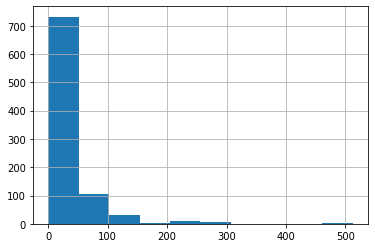

In [9]:
titanic_train["Fare"].hist()

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7f88339947d0>,
      dtype=object)

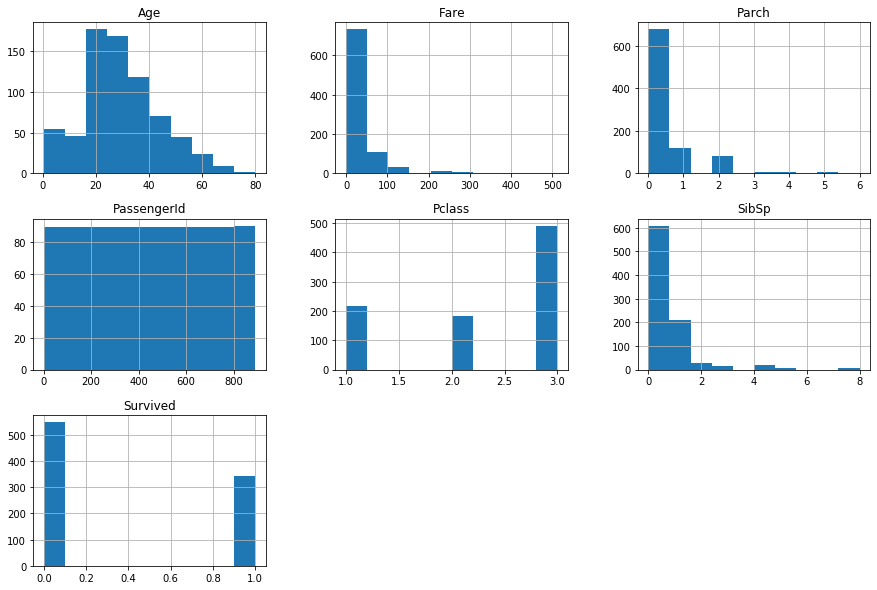

In [10]:
titanic_train.hist(figsize=(15, 10))

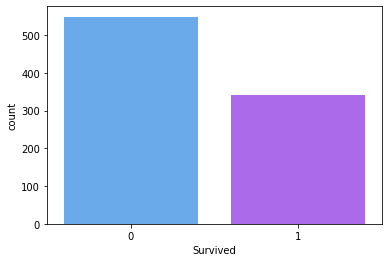

In [11]:
sns.countplot(x="Survived", data=titanic_train, palette="cool")

In [12]:
survived = titanic_train[titanic_train["Survived"] == 1]
not_survived = titanic_train[titanic_train["Survived"] == 0]

survived_percentage = len(survived) / len(titanic_train) * 100.0
not_survived_percentage = len(not_survived) / len(titanic_train) * 100.0

print("Verstorben: %i (%.1f%%)"%(len(not_survived), not_survived_percentage))
print("Überlebt: %i (%.1f%%)"%(len(survived), survived_percentage))

Verstorben: 549 (61.6%)
Überlebt: 342 (38.4%)


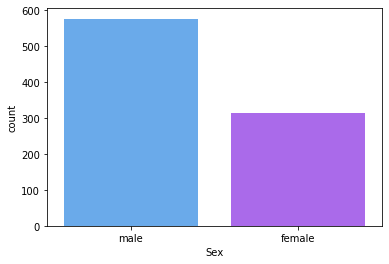

In [13]:
sns.countplot(x="Sex", data=titanic_train, palette="cool")

In [14]:
titanic_train["Sex"].value_counts()

male      577
female    314
Name: Sex, dtype: int64

In [15]:
titanic_train.groupby("Sex")["Survived"].value_counts()

Sex     Survived
female  1           233
        0            81
male    0           468
        1           109
Name: Survived, dtype: int64

In [16]:
titanic_train.groupby("Sex")["Survived"].mean()

Sex
female    0.742038
male      0.188908
Name: Survived, dtype: float64

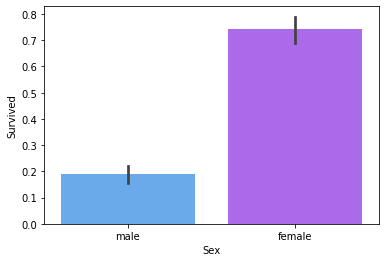

In [17]:
sns.barplot(x="Sex", y="Survived", data=titanic_train, palette="cool")

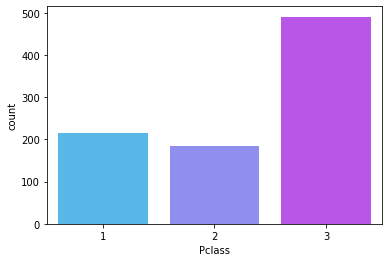

In [18]:
sns.countplot(x="Pclass", data=titanic_train, palette="cool")

In [19]:
titanic_train["Pclass"].value_counts()

3    491
1    216
2    184
Name: Pclass, dtype: int64

In [20]:
titanic_train.groupby("Pclass")["Survived"].value_counts()

Pclass  Survived
1       1           136
        0            80
2       0            97
        1            87
3       0           372
        1           119
Name: Survived, dtype: int64

In [21]:
titanic_train.groupby("Pclass")["Survived"].mean()

Pclass
1    0.629630
2    0.472826
3    0.242363
Name: Survived, dtype: float64

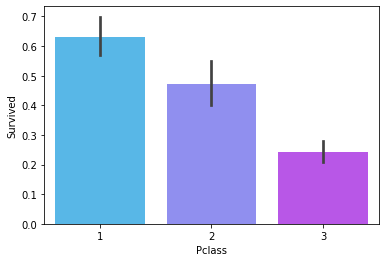

In [22]:
sns.barplot(x="Pclass", y="Survived", data=titanic_train, palette="cool")

Sex     female  male
Pclass              
1           94   122
2           76   108
3          144   347


Text(0, 0.5, 'Verteilung in %')

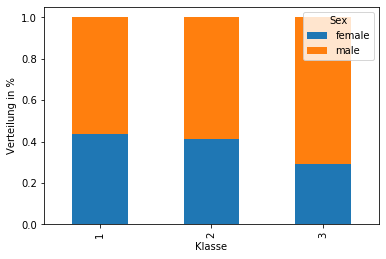

In [23]:
tabelle = pd.crosstab(titanic_train["Pclass"], titanic_train["Sex"])
print(tabelle)

tabelle.div(tabelle.sum(1).astype(float), axis=0).plot(kind="bar", stacked=True)
plt.xlabel("Klasse")
plt.ylabel("Verteilung in %")

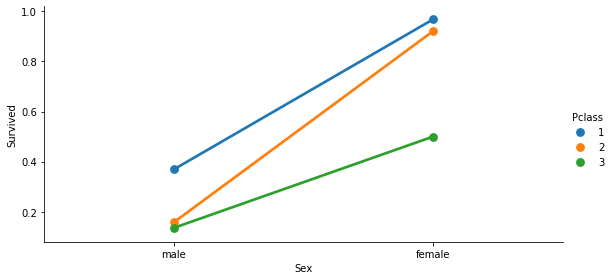

In [24]:
sns.catplot(x="Sex", y="Survived", hue="Pclass", data=titanic_train, height=4, aspect=2, ci=False, kind="point")

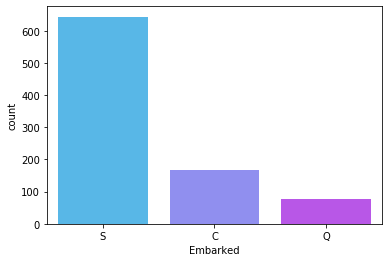

In [25]:
sns.countplot(x="Embarked", data=titanic_train, palette="cool")

In [26]:
titanic_train["Embarked"].value_counts()

S    644
C    168
Q     77
Name: Embarked, dtype: int64

In [27]:
titanic_train.groupby("Embarked")["Survived"].value_counts()

Embarked  Survived
C         1            93
          0            75
Q         0            47
          1            30
S         0           427
          1           217
Name: Survived, dtype: int64

In [28]:
titanic_train.groupby("Embarked")["Survived"].mean()

Embarked
C    0.553571
Q    0.389610
S    0.336957
Name: Survived, dtype: float64

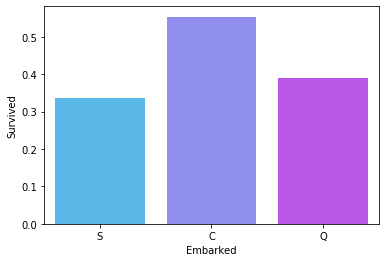

In [29]:
sns.barplot(x="Embarked", y="Survived", data=titanic_train, palette="cool", ci=False)

In [30]:
titanic_train.groupby("Embarked")["Sex"].value_counts()

Embarked  Sex   
C         male       95
          female     73
Q         male       41
          female     36
S         male      441
          female    203
Name: Sex, dtype: int64

In [31]:
pd.crosstab(titanic_train["Embarked"], titanic_train["Sex"])

Sex,female,male
Embarked,,
C,73,95
Q,36,41
S,203,441


In [32]:
titanic_train.groupby("Embarked")["Age"].mean()


Embarked
C    30.814769
Q    28.089286
S    29.445397
Name: Age, dtype: float64

In [33]:
titanic_train.groupby("Embarked")["Fare"].mean()

Embarked
C    59.954144
Q    13.276030
S    27.079812
Name: Fare, dtype: float64

In [34]:
titanic_train.groupby("Embarked")["Pclass"].value_counts()

Embarked  Pclass
C         1          85
          3          66
          2          17
Q         3          72
          2           3
          1           2
S         3         353
          2         164
          1         127
Name: Pclass, dtype: int64

In [35]:
titanic_train["Parch"].value_counts()

0    678
1    118
2     80
5      5
3      5
4      4
6      1
Name: Parch, dtype: int64

In [36]:
titanic_train.groupby("Parch")["Survived"].value_counts()

Parch  Survived
0      0           445
       1           233
1      1            65
       0            53
2      0            40
       1            40
3      1             3
       0             2
4      0             4
5      0             4
       1             1
6      0             1
Name: Survived, dtype: int64

In [37]:
titanic_train.groupby("Parch")["Survived"].mean()

Parch
0    0.343658
1    0.550847
2    0.500000
3    0.600000
4    0.000000
5    0.200000
6    0.000000
Name: Survived, dtype: float64

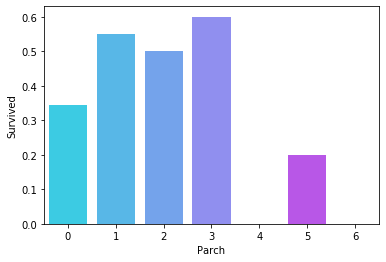

In [38]:
sns.barplot(x="Parch", y="Survived", data=titanic_train, palette="cool", ci=False)

In [39]:
titanic_train["SibSp"].value_counts()

0    608
1    209
2     28
4     18
3     16
8      7
5      5
Name: SibSp, dtype: int64

In [40]:
titanic_train.groupby("SibSp")["Survived"].value_counts()

SibSp  Survived
0      0           398
       1           210
1      1           112
       0            97
2      0            15
       1            13
3      0            12
       1             4
4      0            15
       1             3
5      0             5
8      0             7
Name: Survived, dtype: int64

In [41]:
titanic_train.groupby("SibSp")["Survived"].mean()

SibSp
0    0.345395
1    0.535885
2    0.464286
3    0.250000
4    0.166667
5    0.000000
8    0.000000
Name: Survived, dtype: float64

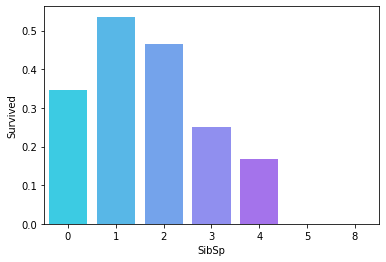

In [42]:
sns.barplot(x="SibSp", y="Survived", data=titanic_train, palette="cool", ci=False)

In [46]:
sns.histplot(x="Age", data=titanic_train)

AttributeError: module 'seaborn' has no attribute 'histplot'

In [44]:
sns.histplot(x="Age", hue="Pclass", data=titanic_train)

AttributeError: module 'seaborn' has no attribute 'histplot'

<AxesSubplot:xlabel='Age', ylabel='Count'>

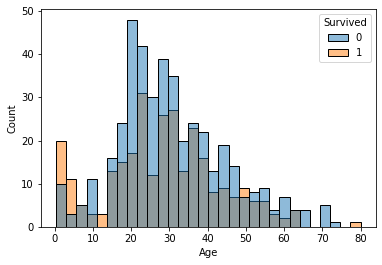

In [45]:
sns.histplot(x="Age", hue="Survived", bins=30, data=titanic_train)

<AxesSubplot:xlabel='Age', ylabel='Count'>

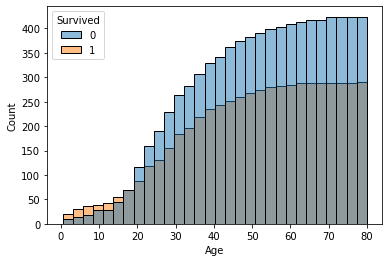

In [46]:
sns.histplot(x="Age", hue="Survived", bins=30, data=titanic_train, cumulative=True)

In [47]:
titanic_temp = titanic_train[titanic_train["Fare"]<150]

<AxesSubplot:xlabel='Fare', ylabel='Count'>

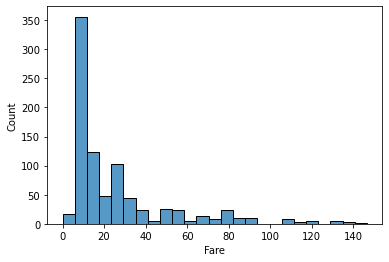

In [48]:
sns.histplot(x="Fare", bins=25, data=titanic_temp)

<AxesSubplot:xlabel='Fare', ylabel='Count'>

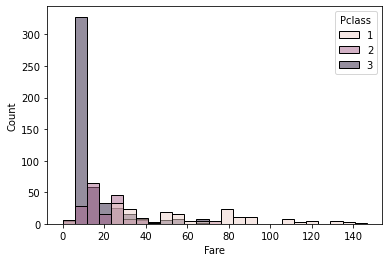

In [49]:
sns.histplot(x="Fare", bins=25, hue="Pclass", data=titanic_temp)

<AxesSubplot:xlabel='Fare', ylabel='Count'>

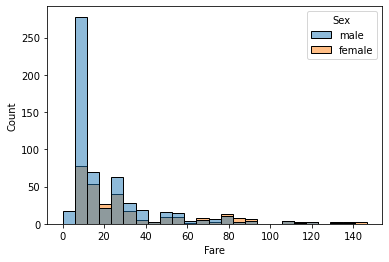

In [50]:
sns.histplot(x="Fare", bins=25, hue="Sex", data=titanic_temp)

<AxesSubplot:xlabel='Fare', ylabel='Count'>

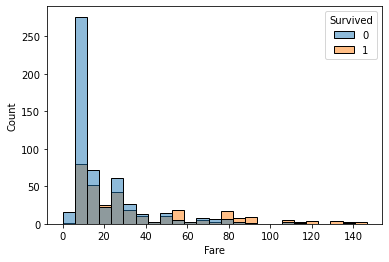

In [51]:
sns.histplot(x="Fare", bins=25, hue="Survived", data=titanic_temp)

<AxesSubplot:xlabel='Fare', ylabel='Count'>

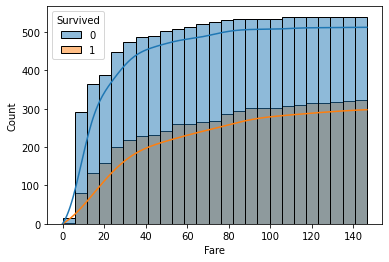

In [52]:
sns.histplot(x="Fare", bins=25, hue="Survived", data=titanic_temp, cumulative=True, kde=True)

In [53]:
titanic_train.drop("PassengerId", axis=1).corr()

,Survived,Pclass,Age,SibSp,Parch,Fare
Survived,1.000000,-0.338481,-0.077221,-0.035322,0.081629,0.257307
Pclass,-0.338481,1.000000,-0.369226,0.083081,0.018443,-0.549500
Age,-0.077221,-0.369226,1.000000,-0.308247,-0.189119,0.096067
SibSp,-0.035322,0.083081,-0.308247,1.000000,0.414838,0.159651
Parch,0.081629,0.018443,-0.189119,0.414838,1.000000,0.216225
Fare,0.257307,-0.549500,0.096067,0.159651,0.216225,1.000000


<AxesSubplot:>

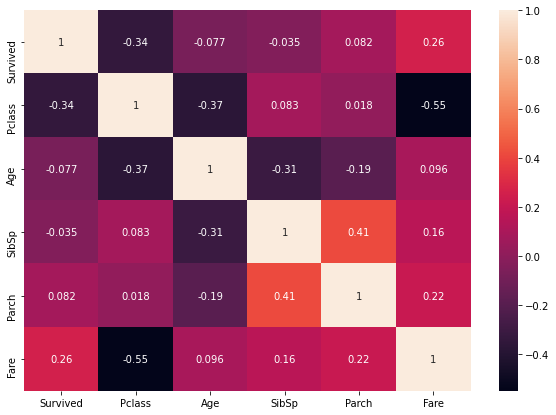

In [54]:
plt.figure(figsize=(10,7))
sns.heatmap(titanic_train.drop("PassengerId", axis=1).corr(), annot=True)

In [55]:
titanic_train[titanic_train["Age"].isnull()]

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
5,6,0,3,"Moran, Mr. James",male,NaN,0,0,330877,8.4583,NaN,Q
17,18,1,2,"Williams, Mr. Charles Eugene",male,NaN,0,0,244373,13.0000,NaN,S
19,20,1,3,"Masselmani, Mrs. Fatima",female,NaN,0,0,2649,7.2250,NaN,C
26,27,0,3,"Emir, Mr. Farred Chehab",male,NaN,0,0,2631,7.2250,NaN,C
28,29,1,3,"O'Dwyer, Miss. Ellen ""Nellie""",female,NaN,0,0,330959,7.8792,NaN,Q
...,...,...,...,...,...,...,...,...,...,...,...,...
859,860,0,3,"Razi, Mr. Raihed",male,NaN,0,0,2629,7.2292,NaN,C
863,864,0,3,"Sage, Miss. Dorothy Edith ""Dolly""",female,NaN,8,2,CA. 2343,69.5500,NaN,S
868,869,0,3,"van Melkebeke, Mr. Philemon",male,NaN,0,0,345777,9.5000,NaN,S
878,879,0,3,"Laleff, Mr. Kristo",male,NaN,0,0,349217,7.8958,NaN,S


In [56]:
mean_age_class1 = titanic_train.Age[titanic_train["Pclass"]==1].mean()
mean_age_class2 = titanic_train.Age[titanic_train["Pclass"]==2].mean()
mean_age_class3 = titanic_train.Age[titanic_train["Pclass"]==3].mean()

titanic_train.loc[(titanic_train["Age"].isnull()) & (titanic_train["Pclass"]==1), "Age"] = mean_age_class1
titanic_train.loc[(titanic_train["Age"].isnull()) & (titanic_train["Pclass"]==2), "Age"] = mean_age_class2
titanic_train.loc[(titanic_train["Age"].isnull()) & (titanic_train["Pclass"]==3), "Age"] = mean_age_class3

titanic_test.loc[(titanic_test["Age"].isnull()) & (titanic_test["Pclass"]==1), "Age"] = mean_age_class1
titanic_test.loc[(titanic_test["Age"].isnull()) & (titanic_test["Pclass"]==2), "Age"] = mean_age_class2
titanic_test.loc[(titanic_test["Age"].isnull()) & (titanic_test["Pclass"]==3), "Age"] = mean_age_class3

In [57]:
mean_fare_class1 = titanic_train.Fare[titanic_train["Pclass"]==1].mean()
mean_fare_class2 = titanic_train.Fare[titanic_train["Pclass"]==2].mean()
mean_fare_class3 = titanic_train.Fare[titanic_train["Pclass"]==3].mean()

titanic_train.loc[(titanic_train["Fare"].isnull()) & (titanic_train["Pclass"]==1), "Fare"] = mean_fare_class1
titanic_train.loc[(titanic_train["Fare"].isnull()) & (titanic_train["Pclass"]==2), "Fare"] = mean_fare_class2
titanic_train.loc[(titanic_train["Fare"].isnull()) & (titanic_train["Pclass"]==3), "Fare"] = mean_fare_class3

titanic_test.loc[(titanic_test["Fare"].isnull()) & (titanic_test["Pclass"]==1), "Fare"] = mean_fare_class1
titanic_test.loc[(titanic_test["Fare"].isnull()) & (titanic_test["Pclass"]==2), "Fare"] = mean_fare_class2
titanic_test.loc[(titanic_test["Fare"].isnull()) & (titanic_test["Pclass"]==3), "Fare"] = mean_fare_class3

In [58]:
titanic_train.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age              0
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

In [59]:
titanic_test.isnull().sum()

PassengerId      0
Pclass           0
Name             0
Sex              0
Age              0
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          327
Embarked         0
dtype: int64

In [60]:
# male -> 0
# female -> 1

mapping = {
    "male": 0,
    "female": 1
}

titanic_train["Sex_encoded"] = titanic_train["Sex"].map(mapping).astype(int)
titanic_test["Sex_encoded"] = titanic_test["Sex"].map(mapping).astype(int)

In [61]:
titanic_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 13 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          891 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
 12  Sex_encoded  891 non-null    int32  
dtypes: float64(2), int32(1), int64(5), object(5)
memory usage: 87.1+ KB


In [62]:
titanic_train.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Sex_encoded
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S,0
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C,1
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S,1
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S,1
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S,0


In [63]:
titanic_train["deck"] = titanic_train["Cabin"].str.replace("[0-9]", "").str.split(" ", expand=True)[0]
titanic_test["deck"] = titanic_test["Cabin"].str.replace("[0-9]", "").str.split(" ", expand=True)[0]

<ipython-input-63-71a0d9f2f1ef>:1: FutureWarning: The default value of regex will change from True to False in a future version.
  titanic_train["deck"] = titanic_train["Cabin"].str.replace("[0-9]", "").str.split(" ", expand=True)[0]
<ipython-input-63-71a0d9f2f1ef>:2: FutureWarning: The default value of regex will change from True to False in a future version.
  titanic_test["deck"] = titanic_test["Cabin"].str.replace("[0-9]", "").str.split(" ", expand=True)[0]


In [64]:
titanic_train["deck"]

0      NaN
1        C
2      NaN
3        C
4      NaN
      ... 
886    NaN
887      B
888    NaN
889      C
890    NaN
Name: deck, Length: 891, dtype: object

In [65]:
titanic_train.groupby("Pclass")["deck"].value_counts()

Pclass  deck
1       C       59
        B       47
        D       29
        E       25
        A       15
        T        1
2       F        8
        D        4
        E        4
3       F        5
        G        4
        E        3
Name: deck, dtype: int64

In [66]:
titanic_train.groupby("deck")["Survived"].mean()

deck
A    0.466667
B    0.744681
C    0.593220
D    0.757576
E    0.750000
F    0.615385
G    0.500000
T    0.000000
Name: Survived, dtype: float64

In [67]:
mapping_cabin = {
    "A": 1,
    "B": 1,
    "C": 2,
    "D": 2,
    "E": 2,
    "F": 3,
    "G": 3,
    "T": 1,
    "M": 0
}

titanic_train.loc[titanic_train["deck"].isnull(), "deck"] = "M"
titanic_test.loc[titanic_test["deck"].isnull(), "deck"] = "M"

titanic_train["deck_encoded"] = titanic_train["deck"].map(mapping_cabin).astype(int)
titanic_test["deck_encoded"] = titanic_test["deck"].map(mapping_cabin).astype(int)

In [68]:
titanic_train.groupby("deck_encoded")["Survived"].mean()

deck_encoded
0    0.299854
1    0.666667
2    0.677419
3    0.588235
Name: Survived, dtype: float64

In [69]:
titanic_train["family"] = titanic_train["Parch"] + titanic_train["SibSp"] + 1
titanic_test["family"] = titanic_test["Parch"] + titanic_test["SibSp"] + 1

In [70]:
titanic_train["isAlone"] = 0
titanic_train.loc[titanic_train["family"] == 1, "isAlone"] = 1

titanic_test["isAlone"] = 0
titanic_test.loc[titanic_test["family"] == 1, "isAlone"] = 1

In [71]:
titanic_train.groupby("isAlone")["Survived"].mean()

isAlone
0    0.505650
1    0.303538
Name: Survived, dtype: float64

<AxesSubplot:>

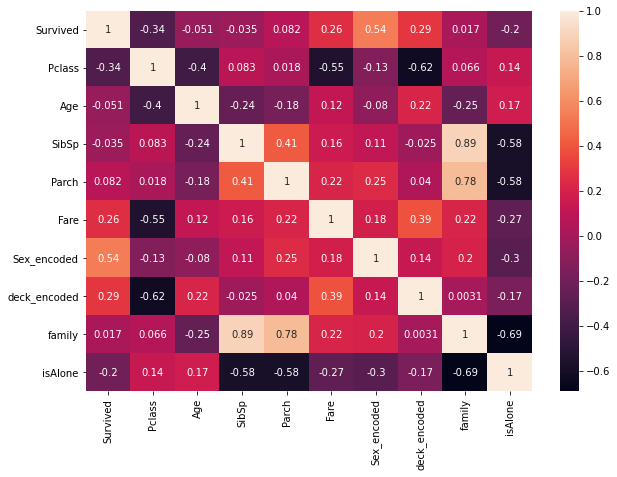

In [72]:
plt.figure(figsize=(10,7))
sns.heatmap(titanic_train.drop("PassengerId", axis=1).corr(), annot=True)

In [73]:
features = ["Pclass", "Age", "Fare", "deck_encoded", "Sex_encoded", "isAlone"]


In [74]:
X_train = titanic_train[features]
y_train = titanic_train["Survived"].copy()

In [75]:
from sklearn.model_selection import cross_val_score, cross_val_predict

In [76]:
from sklearn.linear_model import LogisticRegression

log_clf = LogisticRegression()
cross_val_score(log_clf, X_train, y_train, cv=4, scoring="accuracy")

array([0.80269058, 0.80717489, 0.77130045, 0.80630631])

In [77]:
from sklearn.svm import SVC

svc_clf = SVC(random_state=42)
cross_val_score(svc_clf, X_train, y_train, cv=4, scoring="accuracy")

array([0.57847534, 0.71748879, 0.66367713, 0.68468468])

In [78]:
from sklearn.ensemble import RandomForestClassifier

rf_clf = RandomForestClassifier(random_state=42)
cross_val_score(rf_clf, X_train, y_train, cv=4, scoring="accuracy")

array([0.74439462, 0.85650224, 0.81165919, 0.86036036])

In [79]:
y_pred = cross_val_predict(rf_clf, X_train, y_train, cv=4)
print(y_pred[:15].tolist())
print(y_train[:15].tolist())

[0, 1, 1, 1, 0, 0, 0, 1, 0, 1, 1, 1, 0, 0, 1]
[0, 1, 1, 1, 0, 0, 0, 0, 1, 1, 1, 1, 0, 0, 0]


In [80]:
from sklearn.metrics import confusion_matrix

def plot_cf_matrix(predictions, actuals):
    df_cm= pd.DataFrame(confusion_matrix(predictions, actuals), 
                        columns=np.unique(actuals),
                        index=np.unique(actuals))
    
    df_cm.index.name = "Actual/Tatsächlicher Wert"
    df_cm.columns.name = "Predicted/Vorhergesagter Wert"
    
    sns.heatmap(df_cm, cmap="Blues", annot=True)

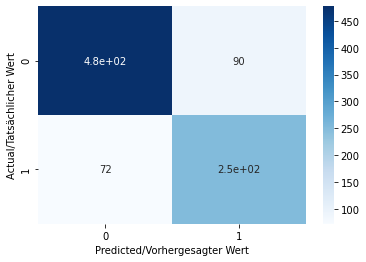

In [81]:
plot_cf_matrix(y_pred, y_train)

In [89]:
from sklearn.model_selection import GridSearchCV

param_grid = [{
    "n_estimators": [250, 500, 750],
    "criterion": ["gini", "entropy"],
    "max_depth": [5, 10, 15, 20]
}]

grid_search = GridSearchCV(rf_clf, 
                           param_grid, 
                           cv=5, 
                           scoring="accuracy", 
                           return_train_score=True)

grid_search.fit(X_train, y_train)

GridSearchCV(cv=5, estimator=RandomForestClassifier(random_state=42),
             param_grid=[{'criterion': ['gini', 'entropy'],
                          'max_depth': [5, 10, 15, 20],
                          'n_estimators': [250, 500, 750]}],
             return_train_score=True, scoring='accuracy')

In [90]:
grid_search.best_params_

{'criterion': 'entropy', 'max_depth': 10, 'n_estimators': 750}

In [91]:
cvres = grid_search.cv_results_

for mean_score, params in zip(cvres["mean_test_score"], cvres["params"]):
    print(mean_score, params)

0.8170736300295023 {'criterion': 'gini', 'max_depth': 5, 'n_estimators': 250}
0.8148201619484026 {'criterion': 'gini', 'max_depth': 5, 'n_estimators': 500}
0.813709120582512 {'criterion': 'gini', 'max_depth': 5, 'n_estimators': 750}
0.8328290753876091 {'criterion': 'gini', 'max_depth': 10, 'n_estimators': 250}
0.833952670893227 {'criterion': 'gini', 'max_depth': 10, 'n_estimators': 500}
0.8317054798819911 {'criterion': 'gini', 'max_depth': 10, 'n_estimators': 750}
0.8227355470466386 {'criterion': 'gini', 'max_depth': 15, 'n_estimators': 250}
0.8238528654823927 {'criterion': 'gini', 'max_depth': 15, 'n_estimators': 500}
0.8227355470466386 {'criterion': 'gini', 'max_depth': 15, 'n_estimators': 750}
0.823846588412529 {'criterion': 'gini', 'max_depth': 20, 'n_estimators': 250}
0.8216056744711568 {'criterion': 'gini', 'max_depth': 20, 'n_estimators': 500}
0.8249701839181469 {'criterion': 'gini', 'max_depth': 20, 'n_estimators': 750}
0.812591802146758 {'criterion': 'entropy', 'max_depth': 5,

In [92]:
final_model = grid_search.best_estimator_

In [93]:
titanic_test.isnull().sum()

PassengerId       0
Pclass            0
Name              0
Sex               0
Age               0
SibSp             0
Parch             0
Ticket            0
Fare              0
Cabin           327
Embarked          0
Sex_encoded       0
deck              0
deck_encoded      0
family            0
isAlone           0
dtype: int64

In [94]:
titanic = titanic_test[features]
titanic

,Pclass,Age,Fare,deck_encoded,Sex_encoded,isAlone
0,3,34.50000,7.8292,0,0,1
1,3,47.00000,7.0000,0,1,0
2,2,62.00000,9.6875,0,0,1
3,3,27.00000,8.6625,0,0,1
4,3,22.00000,12.2875,0,1,0
...,...,...,...,...,...,...
413,3,25.14062,8.0500,0,0,1
414,1,39.00000,108.9000,2,1,1
415,3,38.50000,7.2500,0,0,1
416,3,25.14062,8.0500,0,0,1


In [95]:

final_predictions = final_model.predict(titanic)

titanic_test["Survived"] = final_predictions
titanic_test.head()

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Sex_encoded,deck,deck_encoded,family,isAlone,Survived
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q,0,M,0,1,1,0
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S,1,M,0,2,0,0
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q,0,M,0,1,1,0
3,895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S,0,M,0,1,1,0
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S,1,M,0,3,0,0


In [98]:
# | PassengerID | Survived |

titanic_test[["PassengerId", "Survived"]].to_csv("submission.csv", index=False)